In [62]:
from models.EEGModels import EEGNet, ShallowConvNet, DeepConvNet
from tensorflow.keras import utils as np_utils
import numpy as np
from utils.dataloader import load_eeg_data_mat
from sklearn.model_selection import train_test_split

In [13]:
directory = 'C:/Users/Maods/Documents/TCC/data/BCICIV_1_mat/'
ext = 'BCICIV_calib_ds1a.mat'
x_mat,y_mat = load_eeg_data_mat(directory, ext)
x_mat.shape

Shape of EEG: (59, 190594)
Sample rate: 100
Number of channels: 59
Channel names: ['AF3', 'AF4', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'CFC7', 'CFC5', 'CFC3', 'CFC1', 'CFC2', 'CFC4', 'CFC6', 'CFC8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'CCP7', 'CCP5', 'CCP3', 'CCP1', 'CCP2', 'CCP4', 'CCP6', 'CCP8', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'PO1', 'PO2', 'O1', 'O2']
Number of events: 1
Event codes: [-1  1]
Class labels: ['left', 'foot']
Number of classes: 2
Shape of trials[cl1]: (100, 59, 200)
Shape of trials[cl2]: (100, 59, 200)


(200, 59, 200)

In [43]:
# take 50/25/25 percent of the data to train/validate/test
X_train, X_aux, Y_train, y_aux = train_test_split( x_mat, y_mat, test_size=0.5, random_state=42)
X_validate, X_test, Y_validate, Y_test = train_test_split( X_aux, y_aux, test_size=0.5, random_state=42)

Y_train      = np_utils.to_categorical(Y_train)
Y_validate   = np_utils.to_categorical(Y_validate)
Y_test       = np_utils.to_categorical(Y_test)


In [44]:
kernels, chans, samples = 1, 59, 200

X_train      = X_train.reshape(X_train.shape[0], chans, samples, kernels)
X_validate   = X_validate.reshape(X_validate.shape[0], chans, samples, kernels)
X_test       = X_test.reshape(X_test.shape[0], chans, samples, kernels)

In [45]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (100, 59, 200, 1)
100 train samples
50 test samples


In [55]:
model = EEGNet(nb_classes = 2, Chans = chans, Samples = samples, 
               dropoutRate = 0.5, kernLength = 32, F1 = 8, D = 2, F2 = 16, 
               dropoutType = 'Dropout')

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics = ['accuracy'])

numParams    = model.count_params()

class_weights = {0:1, 1:1}

fittedModel = model.fit(X_train, Y_train, batch_size = 16, epochs = 300, 
                        verbose = 2, validation_data=(X_validate, Y_validate), class_weight = class_weights)

probs       = model.predict(X_test)
preds       = probs.argmax(axis = -1)  
acc         = np.mean(preds == Y_test.argmax(axis=-1))
print("Classification accuracy: %f " % (acc))

Epoch 1/300
7/7 - 1s - loss: 0.7130 - accuracy: 0.4700 - val_loss: 0.6946 - val_accuracy: 0.4600 - 748ms/epoch - 107ms/step
Epoch 2/300
7/7 - 0s - loss: 0.6934 - accuracy: 0.5100 - val_loss: 0.6957 - val_accuracy: 0.4600 - 252ms/epoch - 36ms/step
Epoch 3/300
7/7 - 0s - loss: 0.6944 - accuracy: 0.5400 - val_loss: 0.6947 - val_accuracy: 0.4600 - 252ms/epoch - 36ms/step
Epoch 4/300
7/7 - 0s - loss: 0.6863 - accuracy: 0.5900 - val_loss: 0.6928 - val_accuracy: 0.4600 - 250ms/epoch - 36ms/step
Epoch 5/300
7/7 - 0s - loss: 0.6901 - accuracy: 0.5100 - val_loss: 0.6944 - val_accuracy: 0.4600 - 256ms/epoch - 37ms/step
Epoch 6/300
7/7 - 0s - loss: 0.6734 - accuracy: 0.5200 - val_loss: 0.6920 - val_accuracy: 0.4600 - 253ms/epoch - 36ms/step
Epoch 7/300
7/7 - 0s - loss: 0.6685 - accuracy: 0.6000 - val_loss: 0.6859 - val_accuracy: 0.6000 - 253ms/epoch - 36ms/step
Epoch 8/300
7/7 - 0s - loss: 0.6363 - accuracy: 0.6500 - val_loss: 0.6806 - val_accuracy: 0.6600 - 251ms/epoch - 36ms/step
Epoch 9/300
7/7

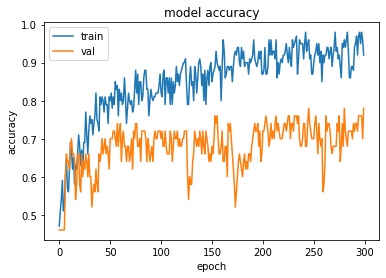

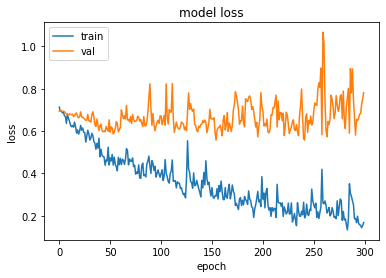

In [60]:
plt.plot(fittedModel.history['accuracy'])
plt.plot(fittedModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(fittedModel.history['loss'])
plt.plot(fittedModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [64]:
model = ShallowConvNet(nb_classes = 2, Chans = chans, Samples = samples)

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics = ['accuracy'])

numParams    = model.count_params()

class_weights = {0:1, 1:1}

fittedModel = model.fit(X_train, Y_train, batch_size = 16, epochs = 300, 
                        verbose = 2, validation_data=(X_validate, Y_validate), class_weight = class_weights)

probs       = model.predict(X_test)
preds       = probs.argmax(axis = -1)  
acc         = np.mean(preds == Y_test.argmax(axis=-1))
print("Classification accuracy: %f " % (acc))

Epoch 1/300
7/7 - 1s - loss: 1.3303 - accuracy: 0.5300 - val_loss: 1.6964 - val_accuracy: 0.4200 - 734ms/epoch - 105ms/step
Epoch 2/300
7/7 - 0s - loss: 1.0196 - accuracy: 0.5900 - val_loss: 1.2074 - val_accuracy: 0.5000 - 277ms/epoch - 40ms/step
Epoch 3/300
7/7 - 0s - loss: 1.0465 - accuracy: 0.4900 - val_loss: 0.8573 - val_accuracy: 0.5000 - 279ms/epoch - 40ms/step
Epoch 4/300
7/7 - 0s - loss: 0.9601 - accuracy: 0.5000 - val_loss: 0.7218 - val_accuracy: 0.5400 - 284ms/epoch - 41ms/step
Epoch 5/300
7/7 - 0s - loss: 0.9422 - accuracy: 0.5400 - val_loss: 0.6908 - val_accuracy: 0.6000 - 285ms/epoch - 41ms/step
Epoch 6/300
7/7 - 0s - loss: 1.0032 - accuracy: 0.5200 - val_loss: 1.0672 - val_accuracy: 0.4200 - 279ms/epoch - 40ms/step
Epoch 7/300
7/7 - 0s - loss: 1.0337 - accuracy: 0.5800 - val_loss: 0.7145 - val_accuracy: 0.5400 - 281ms/epoch - 40ms/step
Epoch 8/300
7/7 - 0s - loss: 0.9622 - accuracy: 0.5300 - val_loss: 0.8143 - val_accuracy: 0.6000 - 274ms/epoch - 39ms/step
Epoch 9/300
7/7

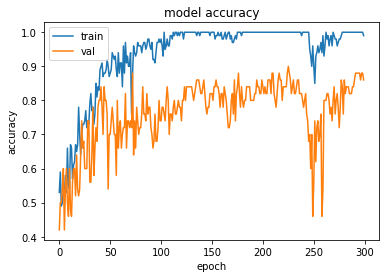

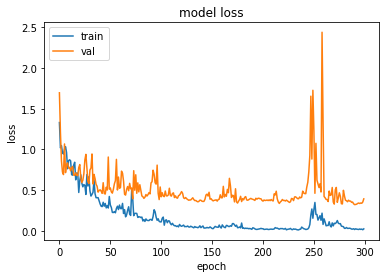

In [65]:
plt.plot(fittedModel.history['accuracy'])
plt.plot(fittedModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(fittedModel.history['loss'])
plt.plot(fittedModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [66]:
model = DeepConvNet(nb_classes = 2, Chans = chans, Samples = samples)

model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics = ['accuracy'])

numParams    = model.count_params()

class_weights = {0:1, 1:1}

fittedModel = model.fit(X_train, Y_train, batch_size = 16, epochs = 300, 
                        verbose = 2, validation_data=(X_validate, Y_validate), class_weight = class_weights)

probs       = model.predict(X_test)
preds       = probs.argmax(axis = -1)  
acc         = np.mean(preds == Y_test.argmax(axis=-1))
print("Classification accuracy: %f " % (acc))

Epoch 1/300
7/7 - 1s - loss: 0.9872 - accuracy: 0.4700 - val_loss: 0.7971 - val_accuracy: 0.4400 - 984ms/epoch - 141ms/step
Epoch 2/300
7/7 - 0s - loss: 0.8859 - accuracy: 0.4800 - val_loss: 0.8179 - val_accuracy: 0.4600 - 241ms/epoch - 34ms/step
Epoch 3/300
7/7 - 0s - loss: 0.7642 - accuracy: 0.5800 - val_loss: 0.7198 - val_accuracy: 0.5000 - 236ms/epoch - 34ms/step
Epoch 4/300
7/7 - 0s - loss: 0.7243 - accuracy: 0.5400 - val_loss: 0.6729 - val_accuracy: 0.6400 - 242ms/epoch - 35ms/step
Epoch 5/300
7/7 - 0s - loss: 0.6918 - accuracy: 0.5200 - val_loss: 0.7287 - val_accuracy: 0.5600 - 252ms/epoch - 36ms/step
Epoch 6/300
7/7 - 0s - loss: 0.8289 - accuracy: 0.5600 - val_loss: 0.7309 - val_accuracy: 0.5200 - 242ms/epoch - 35ms/step
Epoch 7/300
7/7 - 0s - loss: 0.7514 - accuracy: 0.5100 - val_loss: 0.6974 - val_accuracy: 0.5000 - 237ms/epoch - 34ms/step
Epoch 8/300
7/7 - 0s - loss: 0.6919 - accuracy: 0.5400 - val_loss: 0.6897 - val_accuracy: 0.4800 - 235ms/epoch - 34ms/step
Epoch 9/300
7/7

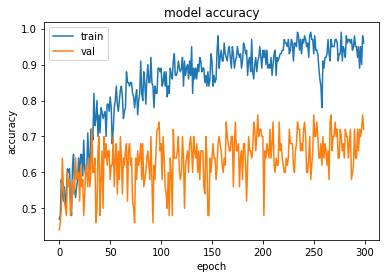

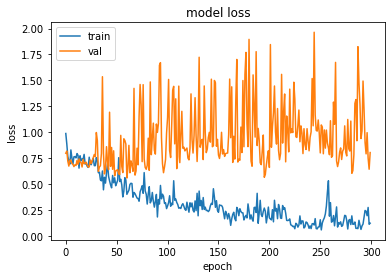

In [67]:
plt.plot(fittedModel.history['accuracy'])
plt.plot(fittedModel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(fittedModel.history['loss'])
plt.plot(fittedModel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Classification accuracy: 0.760000 


<AxesSubplot:title={'center':'xDAWN + RG'}, xlabel='Predicted label', ylabel='True label'>

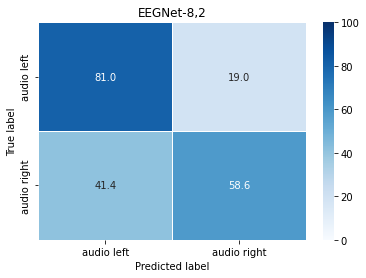

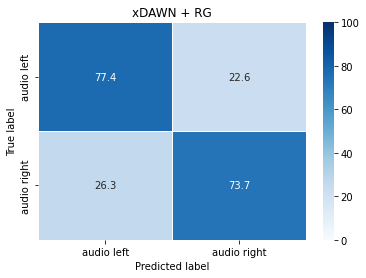

In [54]:
from pyriemann.estimation import XdawnCovariances
from pyriemann.tangentspace import TangentSpace
from pyriemann.utils.viz import plot_confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

n_components = 2  # pick some components

# set up sklearn pipeline
clf = make_pipeline(XdawnCovariances(n_components),
                    TangentSpace(metric='riemann'),
                    LogisticRegression())

preds_rg     = np.zeros(len(Y_test))

# reshape back to (trials, channels, samples)
X_train      = X_train.reshape(X_train.shape[0], chans, samples)
X_test       = X_test.reshape(X_test.shape[0], chans, samples)

# train a classifier with xDAWN spatial filtering + Riemannian Geometry (RG)
# labels need to be back in single-column format
clf.fit(X_train, Y_train.argmax(axis = -1))
preds_rg     = clf.predict(X_test)

# Printing the results
acc2         = np.mean(preds_rg == Y_test.argmax(axis = -1))
print("Classification accuracy: %f " % (acc2))

# plot the confusion matrices for both classifiers
names        = ['audio left', 'audio right']
plt.figure(0)
plot_confusion_matrix(preds, Y_test.argmax(axis = -1), names, title = 'EEGNet-8,2')

plt.figure(1)
plot_confusion_matrix(preds_rg, Y_test.argmax(axis = -1), names, title = 'xDAWN + RG')